In [886]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.svm import SVC

In [887]:
Data = pd.read_csv('P.csv')
Data.head()

,gender,parents visit,parental level of education,restoration,test preparation course,score math,reading score,score bac
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [888]:
Data = Data.dropna()

In [889]:
Data

,gender,parents visit,parental level of education,restoration,test preparation course,score math,reading score,score bac
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [890]:
Data.drop(['reading score','parents visit'],  axis=1, inplace=True)
Data

,gender,parental level of education,restoration,test preparation course,score math,score bac
0,female,bachelor's degree,standard,none,72,74
1,female,some college,standard,completed,69,88
2,female,master's degree,standard,none,90,93
3,male,associate's degree,free/reduced,none,47,44
4,male,some college,standard,none,76,75
...,...,...,...,...,...,...
995,female,master's degree,standard,completed,88,95
996,male,high school,free/reduced,none,62,55
997,female,high school,free/reduced,completed,59,65
998,female,some college,standard,completed,68,77


In [891]:
Data.columns = [each.split()[0] + "_" + each.split()[1] if (len(each.split()) > 1) else each for each in Data.columns ]
print(Data.columns)

Index(['gender', 'parental_level', 'restoration', 'test_preparation',
       'score_math', 'score_bac'],
      dtype='object')


In [892]:
Data

,gender,parental_level,restoration,test_preparation,score_math,score_bac
0,female,bachelor's degree,standard,none,72,74
1,female,some college,standard,completed,69,88
2,female,master's degree,standard,none,90,93
3,male,associate's degree,free/reduced,none,47,44
4,male,some college,standard,none,76,75
...,...,...,...,...,...,...
995,female,master's degree,standard,completed,88,95
996,male,high school,free/reduced,none,62,55
997,female,high school,free/reduced,completed,59,65
998,female,some college,standard,completed,68,77


In [893]:
Data

,gender,parental_level,restoration,test_preparation,score_math,score_bac
0,female,bachelor's degree,standard,none,72,74
1,female,some college,standard,completed,69,88
2,female,master's degree,standard,none,90,93
3,male,associate's degree,free/reduced,none,47,44
4,male,some college,standard,none,76,75
...,...,...,...,...,...,...
995,female,master's degree,standard,completed,88,95
996,male,high school,free/reduced,none,62,55
997,female,high school,free/reduced,completed,59,65
998,female,some college,standard,completed,68,77


Text(0, 0.5, 'Score Bac')

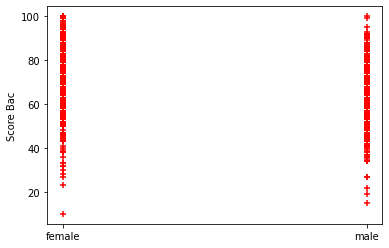

In [894]:
plt.scatter(Data.gender,Data.score_bac,marker='+',color='red')
plt.ylabel('Score Bac')

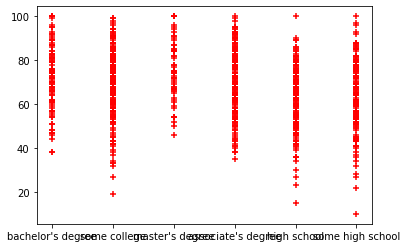

In [895]:
plt.scatter(Data.parental_level,Data.score_bac,marker='+',color='red')

Text(0, 0.5, 'Score Bac')

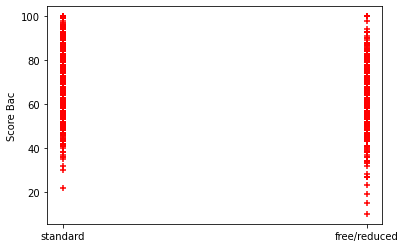

In [896]:
plt.scatter(Data.restoration,Data.score_bac,marker='+',color='red')
plt.ylabel('Score Bac')

Text(0, 0.5, 'Score Bac')

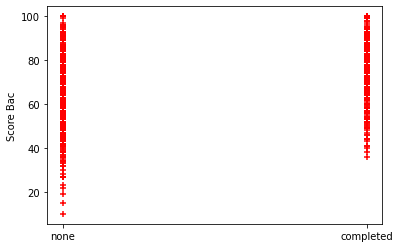

In [897]:
plt.scatter(Data.test_preparation,Data.score_bac,marker='+',color='red')
plt.ylabel('Score Bac')

Text(0, 0.5, 'Score Bac')

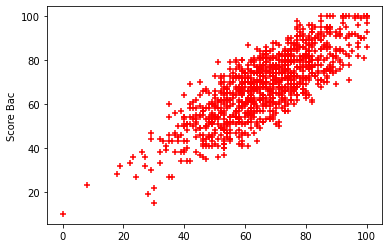

In [898]:
plt.scatter(Data.score_math,Data.score_bac,marker='+',color='red')
plt.ylabel('Score Bac')

In [899]:
X = Data.iloc[:,:-1]
Y = Data.iloc[:,-1]

In [900]:
X

,gender,parental_level,restoration,test_preparation,score_math
0,female,bachelor's degree,standard,none,72
1,female,some college,standard,completed,69
2,female,master's degree,standard,none,90
3,male,associate's degree,free/reduced,none,47
4,male,some college,standard,none,76
...,...,...,...,...,...
995,female,master's degree,standard,completed,88
996,male,high school,free/reduced,none,62
997,female,high school,free/reduced,completed,59
998,female,some college,standard,completed,68


In [901]:
Y

0      74
1      88
2      93
3      44
4      75
       ..
995    95
996    55
997    65
998    77
999    86
Name: score_bac, Length: 1000, dtype: int64

In [902]:
Data.columns = [each.split()[0] + "_" + each.split()[1] if (len(each.split()) > 1) else each for each in Data.columns ]
print(Data.columns)

Index(['gender', 'parental_level', 'restoration', 'test_preparation',
       'score_math', 'score_bac'],
      dtype='object')


In [903]:
Data.head()

,gender,parental_level,restoration,test_preparation,score_math,score_bac
0,female,bachelor's degree,standard,none,72,74
1,female,some college,standard,completed,69,88
2,female,master's degree,standard,none,90,93
3,male,associate's degree,free/reduced,none,47,44
4,male,some college,standard,none,76,75


In [904]:
X['gender'].replace( 'female', 0 ,inplace=True)
X['gender'].replace( 'male', 1 ,inplace=True)
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

In [905]:
# dfle = Data
# dfle.gender = le.fit_transform(dfle.gender)
# # dfle.race/ethnicity = le.fit_transform(dfle.race/ethnicity)
# # dfle.parental_level = le.fit_transform(parental_level)
# # dfle.lunch = le.fit_transform(lunch)
# # dfle.test_preparation = le.fit_transform(test_preparation)
# dfle

In [906]:
X['test_preparation'].replace( 'none', 0 ,inplace=True)
X['test_preparation'].replace( 'completed', 1 ,inplace=True)

In [907]:
X['parental_level'].replace( 'bachelor\'s degree', 1 ,inplace=True)
X['parental_level'].replace( 'some college', 2 ,inplace=True)
X['parental_level'].replace( 'master\'s degree', 3 ,inplace=True)
X['parental_level'].replace( 'associate\'s degree', 4 ,inplace=True)
X['parental_level'].replace( 'high school', 5 ,inplace=True)
X['parental_level'].replace( 'some high school', 6 ,inplace=True)

In [908]:
# X['parents visit'].unique()

In [909]:
# X['parents visit'].replace( 'group A', 1 ,inplace=True)
# X['parents visit'].replace( 'group B', 2 ,inplace=True)
# X['parents visit'].replace( 'group C', 3 ,inplace=True)
# X['parents visit'].replace( 'group D', 4 ,inplace=True)
# X['parents visit'].replace( 'group E', 5 ,inplace=True)

In [910]:
X['restoration'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [911]:
X['restoration'].replace( 'standard', 0 ,inplace=True)
X['restoration'].replace( 'free/reduced', 1 ,inplace=True)

In [912]:
X

,gender,parental_level,restoration,test_preparation,score_math
0,0,1,0,0,72
1,0,2,0,1,69
2,0,3,0,0,90
3,1,4,1,0,47
4,1,2,0,0,76
...,...,...,...,...,...
995,0,3,0,1,88
996,1,5,1,0,62
997,0,5,1,1,59
998,0,2,0,1,68


In [913]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [914]:
X_train


,gender,parental_level,restoration,test_preparation,score_math
924,1,5,1,0,74
561,0,2,0,0,63
273,0,2,0,0,65
754,1,4,1,0,58
557,1,3,1,0,61
...,...,...,...,...,...
128,1,3,0,0,82
781,0,3,0,0,77
818,0,5,1,0,60
362,0,2,0,0,52


In [915]:
Y_train

924    69
561    74
273    71
754    53
557    66
       ..
128    74
781    84
818    68
362    58
592    64
Name: score_bac, Length: 800, dtype: int64

In [916]:
regressor = LinearRegression()

regressor.fit(X_train,Y_train)

# model = Lasso()
# model.fit(X_train,Y_train)


LinearRegression()

In [917]:
Y_pred=regressor.predict(X_test)

In [918]:
Y_pred

array([ 61.55815342,  53.9001663 ,  58.36878987,  46.23163314,
        83.87543385,  65.4660283 ,  73.57204193,  66.82370302,
        77.35234645,  68.11324273,  54.82673866,  66.10976017,
        80.08915177,  86.55918192,  79.09897613,  51.39106826,
        61.51564222,  71.43044298,  66.10976017,  72.52673309,
        41.64634906,  82.29888572,  65.20464369,  96.14016093,
        77.18653028,  59.96471789,  74.55791543,  61.64321258,
        87.43894094,  58.49636023,  71.67467385,  55.48554829,
        63.74683206,  71.56855937,  41.42774199,  80.48865277,
        66.94243951,  70.39775614,  84.8020062 ,  73.3808683 ,
        66.27557633,  75.74379641,  75.19110126,  71.82994398,
        62.30409819,  86.55918192,  52.6426285 ,  76.59585565,
        51.49925871,  73.19816473,  77.08041581,  62.86733938,
        50.49192934,  70.82261461,  79.63659353,  70.56330598,
        60.65303695,  69.46493989,  70.61636321,  85.33532146,
        79.23709253,  62.8627709 ,  59.59265034,  72.34

In [919]:
Y_test

684    68
769    57
838    53
628    46
667    87
       ..
529    70
301    52
365    60
898    63
779    82
Name: score_bac, Length: 200, dtype: int64

In [920]:
Y_test.to_numpy()

array([ 68,  57,  53,  46,  87,  73,  69,  66,  79,  75,  49,  67,  74,
        87,  73,  43,  61,  66,  66,  74,  42,  77,  68,  95,  76,  73,
        68,  65,  85,  47,  70,  64,  63,  76,  36,  80,  70,  73,  79,
        69,  69,  80,  70,  74,  62,  94,  53,  77,  53,  77,  82,  62,
        45,  81,  71,  78,  53,  70,  72,  90,  85,  66,  52,  75,  78,
       100,  79,  87,  44, 100,  54, 100,  65,  70,  77,  36,  65,  67,
        66,  70,  78,  42,  99,  86,  76,  40,  43,  69,  73,  74,  74,
        82,  50,  68,  58,  85,  66,  57,  41,  64,  47,  80,  60,  65,
        71,  76,  99,  78,  57,  62,  62,  79,  79,  69,  43,  72,  54,
       100,  86,  60,  79,  68,  57,  81,  86,  47,  45,  23,  62,  75,
        67,  60,  85,  80,  72,  60,  74,  54,  73,  82,  87,  84,  77,
        58,  85,  28,  58,  54,  66,  64,  52,  52,  72,  51,  22,  61,
        68,  42,  64,  65,  69,  61,  52,  70,  57,  81,  72,  81,  60,
        81,  78,  61,  76,  65,  67,  59,  15,  55,  74,  66,  7

In [921]:
regressor.score(X_test,Y_test)

0.8898666178682567

In [923]:
regressor.predict([[0,1,1,1,60]])

array([74.76416682])